In [470]:
#library for scraping data of yahoo finance
from pandas_datareader import data as pdr
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
yf.pdr_override()
#no show warnigs
import warnings
warnings.filterwarnings("ignore")

In [471]:
#select date historical stock
start = dt.datetime(2017,1,1)
end = dt.datetime.now()

In [472]:
#load data from yahoo finance of PriceSmart price stock
df = pdr.get_data_yahoo("PSMT", start, end)

[*********************100%%**********************]  1 of 1 completed


In [473]:
#view data
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,83.949997,84.750000,83.050003,83.800003,77.390869,193900
2017-01-04,83.849998,84.750000,83.300003,83.750000,77.344673,166500
2017-01-05,83.400002,84.099998,81.199997,82.900002,76.559685,339300
2017-01-06,83.750000,90.300003,83.599998,87.900002,81.177277,734900
2017-01-09,87.449997,88.110001,84.599998,84.800003,78.314362,242600


In [474]:
#dat info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1821 entries, 2017-01-03 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1821 non-null   float64
 1   High       1821 non-null   float64
 2   Low        1821 non-null   float64
 3   Close      1821 non-null   float64
 4   Adj Close  1821 non-null   float64
 5   Volume     1821 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 99.6 KB


In [475]:
#count items null
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [476]:
#if you want download data use next code you can use .csv .xlsx .html .json
#df.to_csv("PriceSmart.csv")

In [477]:
#library for graphic visualization
import matplotlib.pyplot as plt
#style of plt
from matplotlib import style
style.use("dark_background")

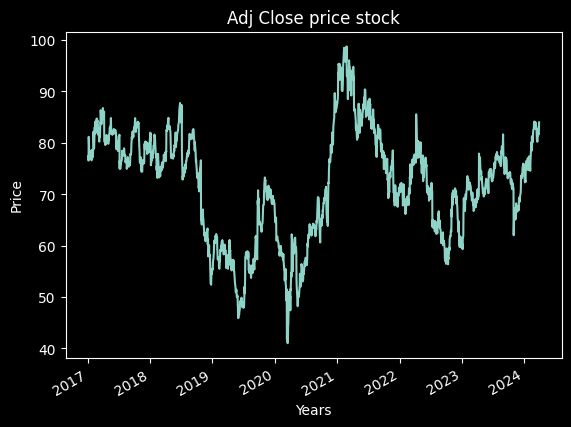

in this graphic show the point most high on year 2021
 None


In [478]:
#construction plotting diagram graphic
df["Adj Close"].plot()
plt.title("Adj Close price stock")
plt.xlabel("Years")
plt.ylabel("Price")
print(f"in this graphic show the point most high on year 2021\n {plt.show()}")

In [479]:
#comparating two stocks
Walmart = pdr.get_data_yahoo("WMT", start, end)
PriceSmart = pdr.get_data_yahoo("PSMT", start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [480]:
print(f"data Walmart \n{Walmart.head(5)}\ndata PriceSmart\n{PriceSmart.head(5)}")

data Walmart 
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-01-03  23.080000  23.080000  22.683332  22.886667  19.986481  31419600
2017-01-04  22.886667  23.209999  22.866667  23.020000  20.102919  23754000
2017-01-05  22.809999  23.110001  22.706667  23.070000  20.146585  21297600
2017-01-06  22.803333  22.833332  22.670000  22.753332  19.870045  28473300
2017-01-09  22.776667  22.933332  22.773333  22.903334  20.001038  26055600
data PriceSmart
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2017-01-03  83.949997  84.750000  83.050003  83.800003  77.390869  193900
2017-01-04  83.849998  84.750000  83.300003  83.750000  77.344673  166500
2017-01-05  83.400002  84.099998  81.199997  82.900002  76.559685  339300
2017-01-06  83.750000  90.300003  83.599998  87.900002  81.177277  7

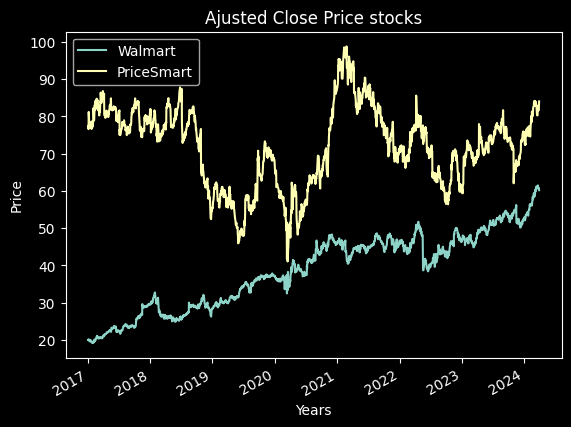

in this graphic show the comparation between Walmart and PriceSmart stock price 2017 to 2024
 None


In [481]:
#construction plotting diagram graphic comparative
Walmart["Adj Close"].plot(label="Walmart")
PriceSmart["Adj Close"].plot(label="PriceSmart")
plt.title("Ajusted Close Price stocks")
plt.xlabel("Years")
plt.ylabel("Price")
plt.legend(loc="upper left")
print(f"in this graphic show the comparation between Walmart and PriceSmart stock price 2017 to 2024\n {plt.show()}")

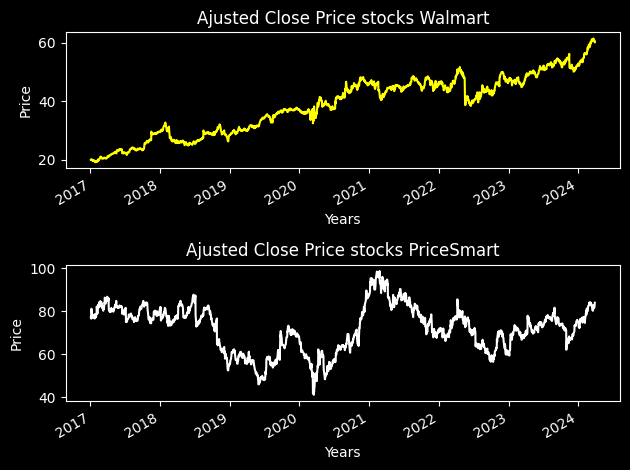

In [482]:
#construction plotting diagram graphic individually
plt.subplot(211)
Walmart["Adj Close"].plot(color="yellow")
plt.title("Ajusted Close Price stocks Walmart")
plt.xlabel("Years")
plt.ylabel("Price")

plt.subplot(212)
PriceSmart["Adj Close"].plot(color="white")
plt.title("Ajusted Close Price stocks PriceSmart")
plt.xlabel("Years")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [483]:
#candlestick charts graphics library
from mpl_finance import candlestick_ohlc
#date formato from matplotlib
import matplotlib.dates as mdate

In [484]:
#preparing data order data
PriceSmart = PriceSmart[["Open", "High", "Low", "Close"]]
#use date as index for skip error in construction of graphic for reset column index
PriceSmart.reset_index()
PriceSmart.reset_index(inplace=True)
PriceSmart["Date"]=PriceSmart["Date"].map(mdate.date2num)

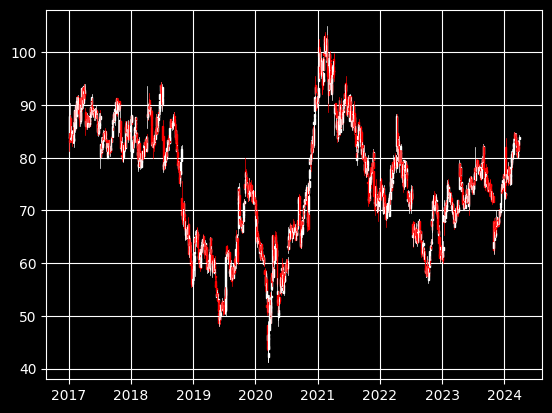

In [485]:
#construction plotting graphic
ax = plt.subplot()
candlestick_ohlc(ax, PriceSmart.values, width=5, colordown="r", colorup="w")
ax.grid()
ax.xaxis_date()
plt.show()

In [486]:
#construction plotting multiple days
PriceSmart = pdr.get_data_yahoo("PSMT", start, end)
PriceSmart_days = PriceSmart["Adj Close"].resample("30D").ohlc()


[*********************100%%**********************]  1 of 1 completed


In [487]:
#creatig volume
PriceSmart_volume = PriceSmart["Volume"].resample("30D").sum()

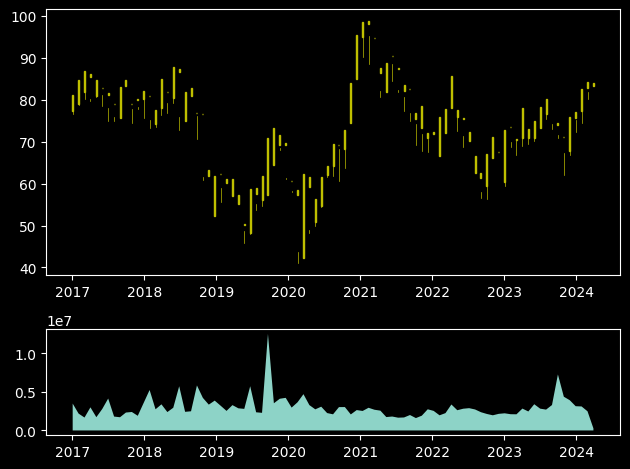

in this graphic show analisys of growth sock per month
None


In [488]:
#define two subtot with funtion subplot2grid
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((6,1),(4,0), rowspan=2, colspan=1, sharex=ax1)
ax1.xaxis_date()
#creating graphic
PriceSmart_days.reset_index()
PriceSmart_days.reset_index(inplace=True)
PriceSmart_days["Date"]=PriceSmart_days["Date"].map(mdate.date2num)
candlestick_ochl(ax1, PriceSmart_days.values, width=5, colorup="y", colordown="r")
ax2.fill_between(PriceSmart_volume.index.map(mdate.date2num), PriceSmart_volume.values)
plt.tight_layout()
print(f"in this graphic show analisys of growth sock per month\n{plt.show()}")

In [489]:
#180 days moving average in new column
PriceSmart["180D mean"] = PriceSmart["Adj Close"].rolling(window=180, min_periods=0).mean()
#drop nan
PriceSmart.dropna(inplace=True)
#show new data
PriceSmart.head(10)

,Open,High,Low,Close,Adj Close,Volume,180D mean
Date,,,,,,,
2017-01-03,83.949997,84.750000,83.050003,83.800003,77.390869,193900,77.390869
2017-01-04,83.849998,84.750000,83.300003,83.750000,77.344673,166500,77.367771
2017-01-05,83.400002,84.099998,81.199997,82.900002,76.559685,339300,77.098409
2017-01-06,83.750000,90.300003,83.599998,87.900002,81.177277,734900,78.118126
2017-01-09,87.449997,88.110001,84.599998,84.800003,78.314362,242600,78.157373
2017-01-10,85.000000,85.199997,84.150002,84.800003,78.314362,253500,78.183538
2017-01-11,84.800003,85.050003,83.959999,84.650002,78.175850,147600,78.182440
2017-01-12,84.349998,84.599998,83.050003,83.449997,77.067619,107500,78.043087
2017-01-13,83.550003,84.250000,83.449997,84.050003,77.621742,60000,77.996271


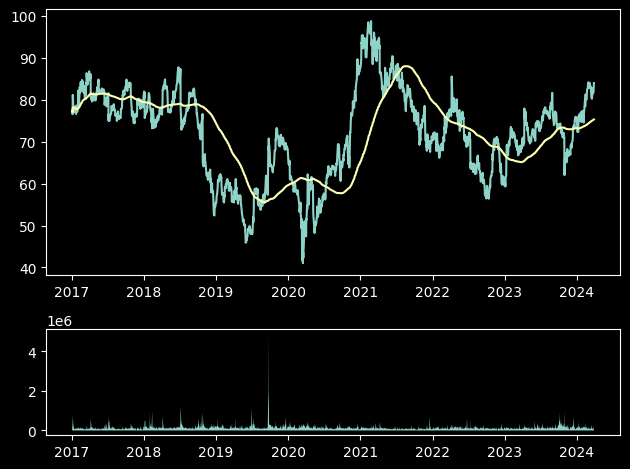

in this graphic show analisys of growth sock per semestral
None


In [490]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=4, colspan=1)
ax2 = plt.subplot2grid((6,1),(4,0), rowspan=2, colspan=1, sharex=ax1)
#creating graphic
ax1.plot(PriceSmart.index, PriceSmart["Adj Close"])
ax1.plot(PriceSmart.index, PriceSmart["180D mean"])
ax2.fill_between(PriceSmart.index, PriceSmart["Volume"])
plt.tight_layout()
plt.show()
print(f"in this graphic show analisys of growth sock per semestral\n{plt.show()}")

[*********************100%%**********************]  1 of 1 completed


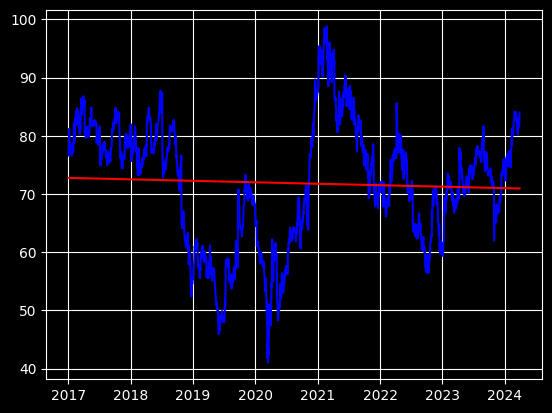

in this graphic show a negative linear regression
None


In [491]:
#regression linear Y= β0*X + β1 + ε
PriceSmart = pdr.get_data_yahoo("PSMT", start, end)
data = PriceSmart["Adj Close"]
#declare X
x = data.index.map(mdate.date2num)
#fit model with numpy
fit = np.polyfit(x, data.values, 1)
fit1d = np.poly1d(fit)
#contruction graphic regression lineal
plt.grid()
plt.plot(data.index, data.values, "b")
plt.plot(data.index, fit1d(x), "r")
print(f"in this graphic show a negative linear regression\n{plt.show()}")

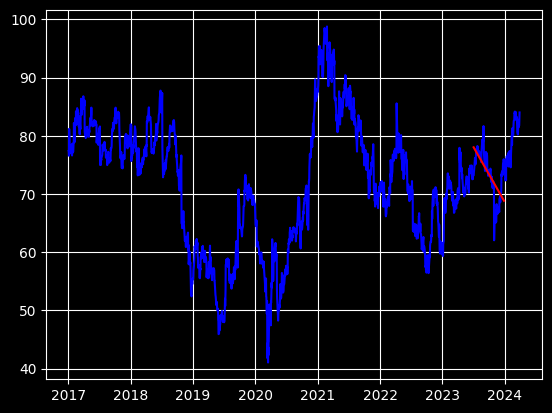

In [492]:
#time frame 1-2023 to 1-2024
start1 = dt.datetime(2023,7,1)
end1 = dt.datetime(2024,1,1)
#fit data
fit_data = data.reset_index()
pos1 = fit_data[fit_data.Date>=start1].index[0]
pos2 = fit_data[fit_data.Date<=end1].index[-1]
fit_data = fit_data.iloc[pos1:pos2]
date = fit_data.Date.map(mdate.date2num)
fit = np.polyfit(date, fit_data["Adj Close"], 1)
fit1d = np.poly1d(fit)
#contruction graphic
plt.grid()
plt.plot(data.index, data.values, "b")
plt.plot(fit_data.Date, fit1d(date), "r")
plt.show()


In [493]:
#predicting share prices library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [494]:
#load data
PriceSmart = pdr.get_data_yahoo("PSMT", start, end)
data = PriceSmart["Adj Close"]
data = pd.DataFrame(data)
days = 5
data["Shifted"]=data["Adj Close"].shift(-days)
data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [495]:
data.head(5)

,Adj Close,Shifted
Date,,
2017-01-03,77.390869,78.314362
2017-01-04,77.344673,78.175850
2017-01-05,76.559685,77.067619
2017-01-06,81.177277,77.621742
2017-01-09,78.314362,78.175850


In [496]:
#prepare data
x = np.array(data.drop(["Shifted"],axis=1))
y = np.array(data["Shifted"])
x = preprocessing.scale(x)
#train an test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [497]:
#preparate model linear regression
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(f"this model have an {accuracy*100} percent of prediction")

this model have an 94.09787511698728 percent of prediction


In [498]:
#predicting data
x = x[:-days]
x_new = x[-days:]
prediction = clf.predict(x_new)
fechas_prediccion = data.index[-days:]
for idx, (fecha, pred) in enumerate(zip(fechas_prediccion, prediction)):
    print(f"prediction for date {fecha}: {pred}")

prediction for date 2024-03-15 00:00:00: 82.50824991191105
prediction for date 2024-03-18 00:00:00: 82.85366010597495
prediction for date 2024-03-19 00:00:00: 82.46027342710846
prediction for date 2024-03-20 00:00:00: 82.07648350923924
prediction for date 2024-03-21 00:00:00: 80.91552431481814
